In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('bank-full.csv', delimiter=';')

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
columns = [
    'age', 
    'job', 
    'marital', 
    'education', 
    'balance', 
    'housing', 
    'contact', 
    'day', 
    'month', 
    'duration', 
    'campaign', 
    'pdays', 
    'previous', 
    'poutcome',
    'y'
]

df = df[columns]

## Splitting Dataset

In [7]:
from sklearn.model_selection import train_test_split

In [89]:
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=1)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=1)

In [88]:
len(df_train), len(df_test), len(df_val)

(27126, 9043, 9042)

## Q1

In [10]:
from sklearn.metrics import roc_auc_score

In [11]:
numerical = ['balance', 'day', 'duration', 'previous']

In [14]:
y_train = (df_train.y == 'yes').astype(int)
y_train

23520    0
14941    0
40686    1
29432    0
840      0
        ..
43723    0
32511    0
5192     0
12172    0
33003    0
Name: y, Length: 27126, dtype: int32

In [15]:
highest_auc = 0

for column in numerical:
    auc_score = roc_auc_score(y_train, df_train[column])

    if auc_score < 0.5:
        auc_score = roc_auc_score(y_train, -df_train[column])
    print(f"The columns is: {column} and the score is: {auc_score}")

    if auc_score > highest_auc:
            highest_auc = auc_score
            best_feature = column
print(f"\nThe numerical variable with the highest AUC is: {best_feature} with AUC = {highest_auc}")

The columns is: balance and the score is: 0.5916931412945473
The columns is: day and the score is: 0.5291275984648961
The columns is: duration and the score is: 0.8128648066681694
The columns is: previous and the score is: 0.5986704105715122

The numerical variable with the highest AUC is: duration with AUC = 0.8128648066681694


## Q2

In [16]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [87]:
y_train = (df_train.y == 'yes').astype(int)
y_val = (df_val.y == 'yes').astype(int)
y_test = (df_test.y == 'yes').astype(int)

del df_train['y']
del df_val['y']
del df_test['y']



AttributeError: 'DataFrame' object has no attribute 'y'

In [18]:
dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)
X_val = dv.transform(val_dicts)

In [19]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [20]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [26]:
y_pred = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(f"The AUC score is: {auc:.3f}")

The AUC score is: 0.900


C:\Users\izkid\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


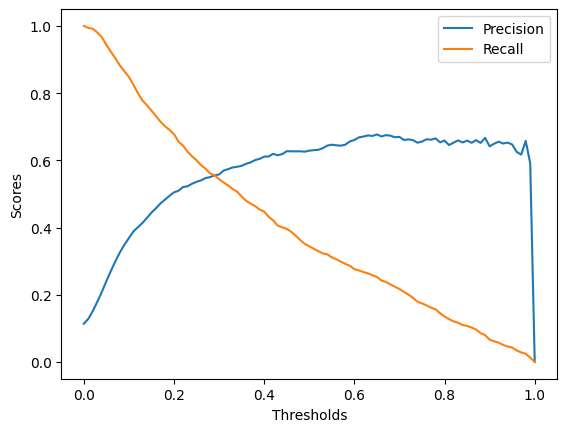

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score

precision_scores = []
recall_scores = []
thresholds = np.arange(0.0, 1.01, 0.01)

for t in thresholds:  # 0 to 100 inclusive
    y_pred_thres = (y_pred >= t)
    recall = recall_score(y_val, y_pred_thres)
    precision = precision_score(y_val, y_pred_thres)

    recall_scores.append(recall)
    precision_scores.append(precision)

plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.xlabel("Thresholds")
plt.ylabel("Scores")
plt.legend()


## Q4

In [61]:
# def calc_f1(precision, recall):
#     if precision != 0 and recall != 0:
#         f1 = 2 * ((precision * recall) / precision + recall)
#         return f1
#     else:
#         return 0

In [69]:
from sklearn.metrics import recall_score, precision_score, f1_score

f1_max = 0
threshold_counter = 0
thresholds = np.arange(0.0, 1.01, 0.01)

for t in thresholds:  
    y_pred_thres = (y_pred >= t)
    score = f1_score(y_val, y_pred_thres)

    if score > f1_max:
        f1_max = score
        threshold_counter = t

print(f"The F1 score is max at threshold: {threshold_counter}, with the f1 score being: {f1_max}")
    

The F1 score is max at threshold: 0.2, with the f1 score being: 0.5786633457866335


## Q5

In [96]:
def train(df_train, y_train, C=C):
    dicts = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [75]:
def predict(df_val, dv, model):
    dicts = df_val.to_dict(orient='records')

    X_val = dv.transform(dicts)
    y_pred = model.predict_proba(X_val)[:, 1]
    return y_pred

In [70]:
from sklearn.model_selection import KFold

In [76]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [78]:
from tqdm.auto import tqdm

In [90]:
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=1)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=1)

In [95]:
n_splits = 5 

scores = []

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

for train_idx, val_idx in tqdm(kfold.split(df_train), total=5):
    df_train_s = df_train.iloc[train_idx]
    df_val_s = df_train.iloc[val_idx]

    y_train_s = (df_train_s.y == 'yes').astype(int)
    y_val_s = (df_val_s.y == 'yes').astype(int)

    df_train_s = df_train_s.drop(columns=['y'])
    df_val_s = df_val_s.drop(columns=['y'])

    dv, model = train(df_train_s, y_train_s)
    y_pred = predict(df_val_s, dv, model)

    auc = roc_auc_score(y_val_s, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

  0%|          | 0/5 [00:00<?, ?it/s]

0.908 +- 0.004


In [ ]:
n_splits = 5 

for C in tqdm([0.000001, 0.001, 1]):
    scores = []

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    for train_idx, val_idx in kfold.split(df_train):
        df_train_s = df_train.iloc[train_idx]
        df_val_s = df_train.iloc[val_idx]
    
        y_train_s = (df_train_s.y == 'yes').astype(int)
        y_val_s = (df_val_s.y == 'yes').astype(int)
    
        df_train_s = df_train_s.drop(columns=['y'])
        df_val_s = df_val_s.drop(columns=['y'])
    
        dv, model = train(df_train_s, y_train_s, C)
        y_pred = predict(df_val_s, dv, model)
    
        auc = roc_auc_score(y_val_s, y_pred)
        scores.append(auc)
        print(f"C: {C}, Mean Score: {np.mean(scores):.3f}, STD: {np.std(scores):.3f}")

  0%|          | 0/3 [00:00<?, ?it/s]

C: 1e-06, Mean Score: 0.701, STD: 0.000
C: 1e-06, Mean Score: 0.703, STD: 0.002
C: 1e-06, Mean Score: 0.697, STD: 0.008
C: 1e-06, Mean Score: 0.695, STD: 0.008
C: 1e-06, Mean Score: 0.696, STD: 0.008
C: 0.001, Mean Score: 0.858, STD: 0.000
C: 0.001, Mean Score: 0.858, STD: 0.000
C: 0.001, Mean Score: 0.855, STD: 0.003
C: 0.001, Mean Score: 0.853, STD: 0.005
C: 0.001, Mean Score: 0.854, STD: 0.005
C: 1, Mean Score: 0.909, STD: 0.000
